# Feature selection with regression lab

You have been exploring feature selection, regularization, and evaluation metrics with classification this week (and last week).

It's time to return to a regression problem.

In this lab you will be working with a dataset on **reservoir levels in California**.

---

### Data summary

The dataset contains these columns:

    id : the reservoir string id
    date : the string date of measurement
    month : the month of measurement
    year : the year of measurement
    reservoir_volume : the current volume of the reservoir
    dam : the dam that supplies water to the reservoir
    lake : a lake associated with the reservoir
    stream : a stream associated with the reservoir
    capacity : the total capacity of the reservoir
    elevation : the string for elevation of the reservoir
    river_basin : string code for basin of the river associated with the reservoir
    county : the string county code that the reservoir is in
    hydrologic_area : another location string identifier
    nearby_city : the city that the reservoir is located near
    latitude : the exact latitude of the reservoir
    longitude : the exact longitude of the reservoir
    operator : the governmental organization that manages the reservoir

---

### Goal of the lab:

Your primary goal is to **predict reservoir levels in 2015 using data from prior years**. Your primary evaluation metric will be **RMSE**, but feel free to try/use others as well.

You have learned may useful skills to tackle this!

- **Data munging/cleaning**
- **EDA**
- **Feature engineering**
- **Feature selection**
- **Regularization/gridsearching**
- **Cross-validation**

Use whatever you can to get the best predictive power! Godspeed.

---

### I WILL BE DOING THE LAB AT THE SAME TIME

**You are competing with me in this lab to get a better RMSE.**

YES, YES, I know it's "unfair" or whatever. However, I will be sharing my progress on my screen as I go through, so you have an advantage in that sense, since you can see what I'm doing as I go.

#### WORK TOGETHER!!!

Good Luck!

---

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
res = pd.read_csv('./dataset/reservoir_levels.csv')

In [71]:
res.head()

,date,month,year,id,reservoir_volume,dam,lake,stream,capacity,elevation,river_basin,county,hydrologic_area,nearby_city,latitude,longitude,operator
0,2000-02,2,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654' ft,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.94,-122.637,Marin Municipal Water District
1,2000-03,3,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654' ft,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.94,-122.637,Marin Municipal Water District
2,2000-04,4,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654' ft,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.94,-122.637,Marin Municipal Water District
3,2000-05,5,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654' ft,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.94,-122.637,Marin Municipal Water District
4,2000-06,6,2000,APN,8250.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654' ft,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.94,-122.637,Marin Municipal Water District


In [72]:
res.dtypes

date                 object
month                 int64
year                  int64
id                   object
reservoir_volume    float64
dam                  object
lake                 object
stream               object
capacity              int64
elevation            object
river_basin          object
county               object
hydrologic_area      object
nearby_city          object
latitude            float64
longitude           float64
operator             object
dtype: object

In [73]:
res.elevation.value_counts()

3700' ft     549
543' ft      549
2675' ft     366
456' ft      366
140' ft      366
250' ft      366
692' ft      366
ft           366
450' ft      183
2606' ft     183
5824' ft     183
252' ft      183
3085' ft     183
659' ft      183
210' ft      183
584' ft      183
7140' ft     183
1404' ft     183
1205' ft     183
5370' ft     183
4134' ft     183
781' ft      183
515' ft      183
8192' ft     183
2176' ft     183
150' ft      183
331' ft      183
4835' ft     183
1870' ft     183
7325' ft     183
            ... 
4552' ft     183
6952' ft     183
5454' ft     183
596' ft      183
4272' ft     183
213' ft      183
426' ft      183
5622' ft     183
2635' ft     183
4960' ft     183
1403' ft     183
3774' ft     183
5046' ft     183
2744' ft     183
485' ft      183
640' ft      183
810' ft      183
9600' ft     183
225' ft      183
707' ft      183
752' ft      183
1210' ft     183
554' ft      183
468' ft      183
784' ft      183
755' ft      183
4097' ft     183
5855' ft     1

In [74]:
res['elevation'] = res.elevation.map(lambda x: x.replace("' ft", ""))

In [75]:
res.elevation = pd.to_numeric(res.elevation, errors = 'coerce')
res.dropna(how = 'any')

,date,month,year,id,reservoir_volume,dam,lake,stream,capacity,elevation,river_basin,county,hydrologic_area,nearby_city,latitude,longitude,operator
0,2000-02,2,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District
1,2000-03,3,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District
2,2000-04,4,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District
3,2000-05,5,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District
4,2000-06,6,2000,APN,8250.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District
5,2000-07,7,2000,APN,7295.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District
6,2000-08,8,2000,APN,6590.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District
7,2000-09,9,2000,APN,5918.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District
8,2000-10,10,2000,APN,5442.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District
9,2000-11,11,2000,APN,5507.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District


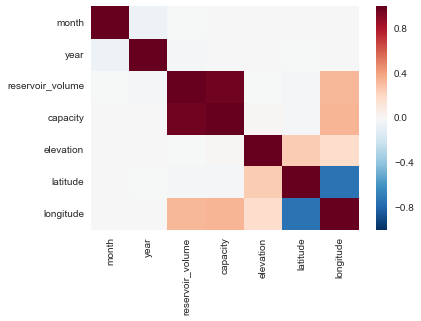

In [76]:
sns.heatmap(res.corr())

In [77]:
x = 'month' + 'year' + 'capacity' + 'elevation' + 'latitude' + 'longitude'
y = 'reservoir_volume'

In [78]:
import patsy
import statsmodels.formula.api as smf

In [79]:
target = 'reservoir_volume'
cols = ['month', 'year', 'capacity', 'elevation', 'latitude', 'longitude']

In [84]:
res_train = res[res.year != 2015][['month', 'year', 'capacity', 'elevation', 'latitude', 'longitude', 'reservoir_volume']]
res_test = res[res.year == 2015]

In [85]:
res_train.ix[:, cols] = (res_train.ix[:, cols] - res_train.ix[:, cols].mean())/res_train.ix[:, cols].std()

In [86]:
res_train.head()

,month,year,capacity,elevation,latitude,longitude,reservoir_volume
0,-1.318183,-1.636726,-0.190328,-0.797206,0.193397,-1.277003,8891.0
1,-1.027240,-1.636726,-0.190328,-0.797206,0.193397,-1.277003,8891.0
2,-0.736297,-1.636726,-0.190328,-0.797206,0.193397,-1.277003,8891.0
3,-0.445354,-1.636726,-0.190328,-0.797206,0.193397,-1.277003,8891.0
4,-0.154411,-1.636726,-0.190328,-0.797206,0.193397,-1.277003,8250.0


In [87]:
formula = 'reservoir_volume ~ month + year + capacity + elevation + latitude + longitude'
Ytrain, Xtrain = patsy.dmatrices(formula, data = res)
Ytest, Xtest = patsy.dmatrices(formula, data = res_test)